In [1]:
import scvelo as scv
import loompy
import velocyto as vcy
import pandas as pd
import scanpy as sc
scv.logging.print_version()
print(loompy.__version__)

Running scvelo 0.2.4 (python 3.9.6) on 2022-04-25 11:39.
3.0.7


ERROR: XMLRPC request failed [code: -32500]
RuntimeError: PyPI's XMLRPC API is currently disabled due to unmanageable load and will be deprecated in the near future. See https://status.python.org/ for more information.


In [2]:
scv.settings.verbosity = 3 # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True # set max width size for presenter view
scv.set_figure_params('scvelo') # for beautified visualization

# Load Data
- Day0 already processed in Writeup4c_scVelo_CIS.ipyr
- Day10_COCL2

In [4]:
day10_cocl2 = scv.read_loom("/home/stat/kevinl1/project/Multiome_fate/BarcodeOutputs/2022_02/Cellranger_count_output/2022_04_day10_COCL2_onlyRNA/velocyto/2022_04_day10_COCL2_onlyRNA.loom",
                          validate=False)

In [5]:
day10_cocl2

AnnData object with n_obs × n_vars = 10428 × 32738
    obs: 'Clusters', '_X', '_Y'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [6]:
clust = ["day10_cocl2" for x in range(day10_cocl2.shape[0])]
clust = pd.Categorical(clust)
day10_cocl2.obs['clusters'] = clust

In [7]:
day10_cocl2

AnnData object with n_obs × n_vars = 10428 × 32738
    obs: 'Clusters', '_X', '_Y', 'clusters'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [8]:
day10_cocl2.write_loom("/home/stat/kevinl1/project/Multiome_fate/out/kevin/Writeup4c/2022_04_day10_COCL2_onlyRNA_labeled.loom")

- Week5 COCL2

In [10]:
week5_cocl2 = scv.read_loom("/home/stat/kevinl1/project/Multiome_fate/BarcodeOutputs/2022_02/Cellranger_count_output/2022_04_week5_COCL2_onlyRNA/velocyto/2022_04_week5_COCL2_onlyRNA.loom",
                          validate=False)

In [11]:
week5_cocl2

AnnData object with n_obs × n_vars = 7047 × 32738
    obs: 'Clusters', '_X', '_Y'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [12]:
clust = ["week5_cocl2" for x in range(week5_cocl2.shape[0])]
clust = pd.Categorical(clust)
week5_cocl2.obs['clusters'] = clust

In [13]:
week5_cocl2

AnnData object with n_obs × n_vars = 7047 × 32738
    obs: 'Clusters', '_X', '_Y', 'clusters'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [14]:
week5_cocl2.write_loom("/home/stat/kevinl1/project/Multiome_fate/out/kevin/Writeup4c/2022_04_week5_COCL2_onlyRNA_labeled.loom")

- Combine datasets

In [15]:
loompy.combine(["/home/stat/kevinl1/project/Multiome_fate/out/kevin/Writeup4c/2022_04_day0_onlyRNA_labeled.loom",
                "/home/stat/kevinl1/project/Multiome_fate/out/kevin/Writeup4c/2022_04_day10_COCL2_onlyRNA_labeled.loom",
                "/home/stat/kevinl1/project/Multiome_fate/out/kevin/Writeup4c/2022_04_week5_COCL2_onlyRNA_labeled.loom"],
                "/home/stat/kevinl1/project/Multiome_fate/out/kevin/Writeup4c/2022_04_COCL2_onlyRNA_labeled.loom", key="Accession")

In [16]:
adata = scv.read_loom("/home/stat/kevinl1/project/Multiome_fate/out/kevin/Writeup4c/2022_04_COCL2_onlyRNA_labeled.loom")

In [17]:
adata

AnnData object with n_obs × n_vars = 26995 × 32738
    obs: 'Clusters', '_X', '_Y', 'clusters'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [18]:
adata.obs['clusters'] = pd.Categorical(adata.obs['clusters'])

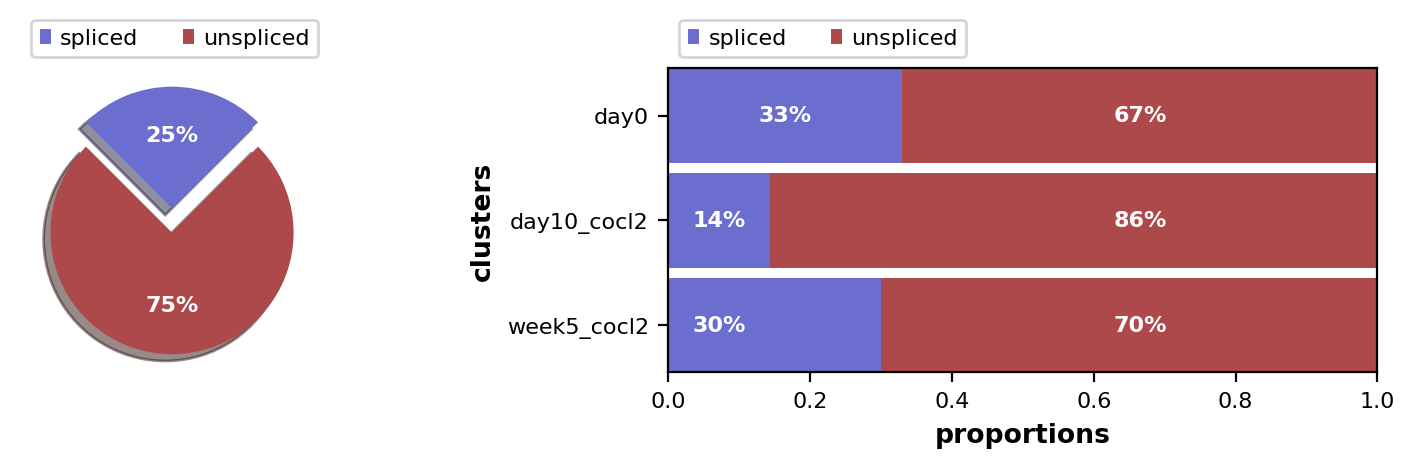

In [19]:
scv.pl.proportions(adata)

# Start scVelo analysis

In [20]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 30212 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:23) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:04) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [21]:
adata

AnnData object with n_obs × n_vars = 26995 × 2000
    obs: 'Clusters', '_X', '_Y', 'clusters', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced', 'Ms', 'Mu'
    obsp: 'distances', 'connectivities'

In [22]:
sc.tl.pca(adata, svd_solver='arpack')

In [23]:
sc.tl.umap(adata)

In [24]:
adata

AnnData object with n_obs × n_vars = 26995 × 2000
    obs: 'Clusters', '_X', '_Y', 'clusters', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced', 'Ms', 'Mu'
    obsp: 'distances', 'connectivities'

In [25]:
sc.tl.leiden(adata)

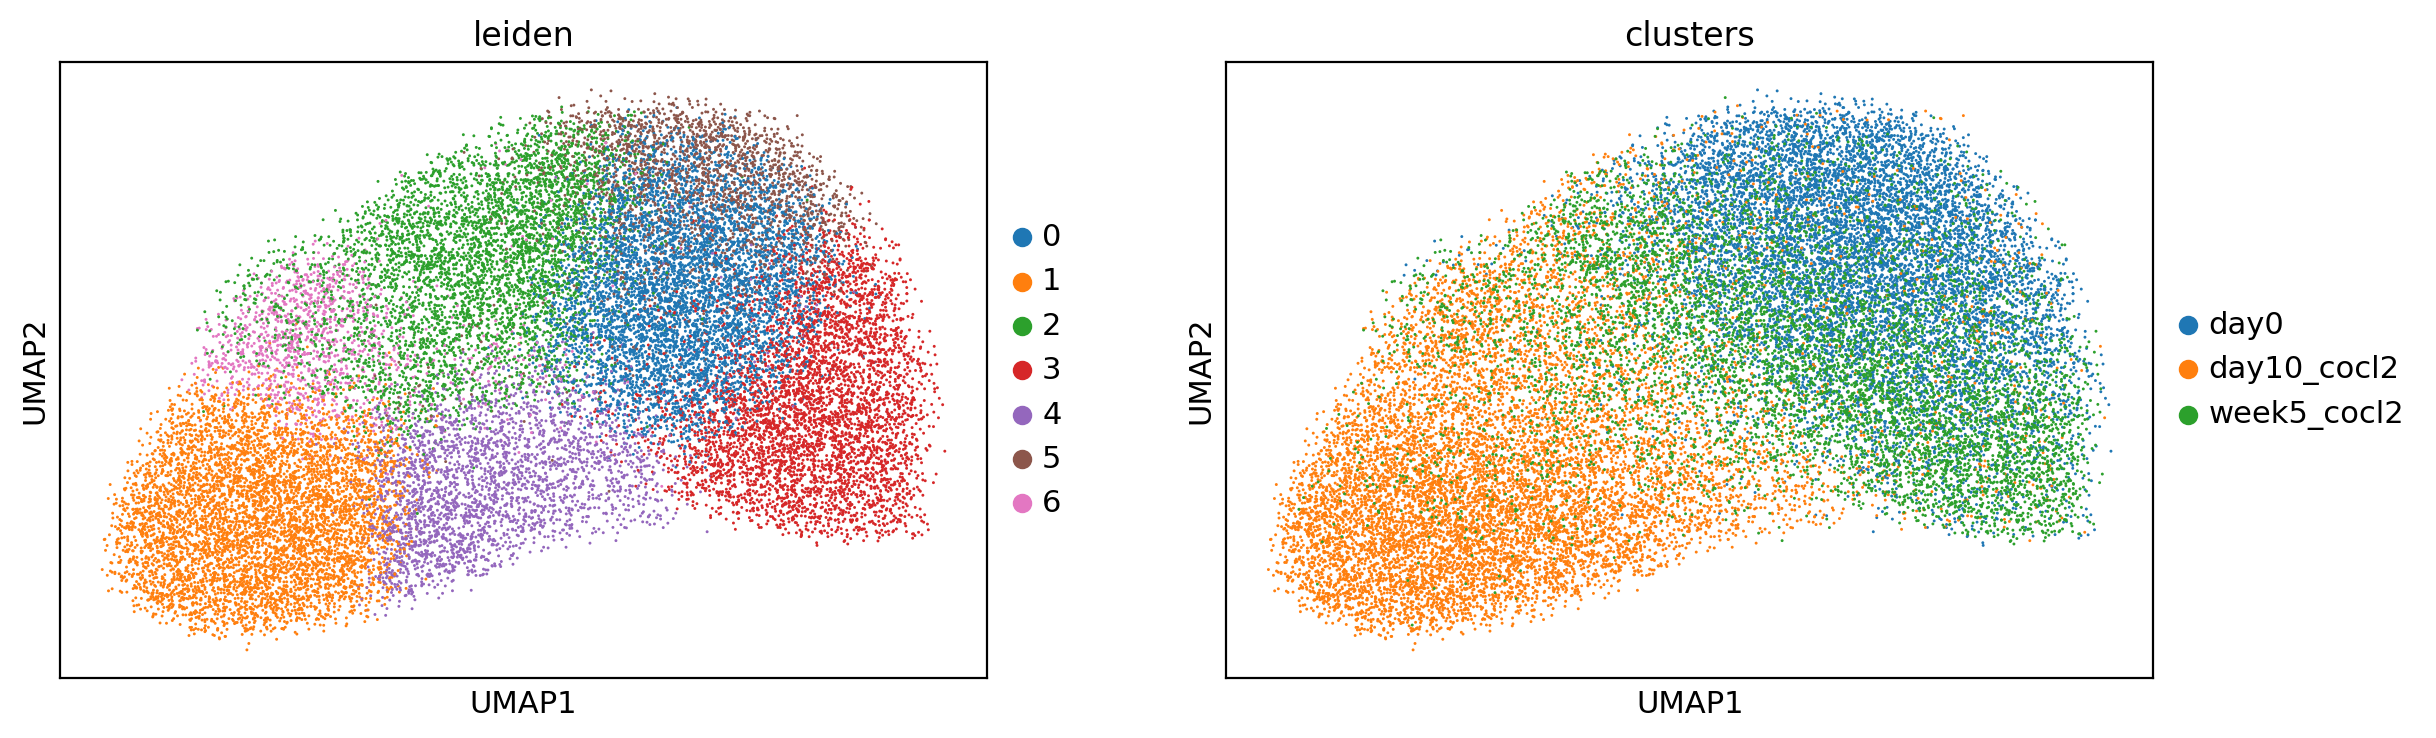

In [26]:
sc.pl.umap(adata, color=['leiden','clusters'])

In [27]:
scv.tl.velocity(adata)
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:04) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/16 cores)


  0%|          | 0/26995 [00:00<?, ?cells/s]

    finished (0:00:22) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:10) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


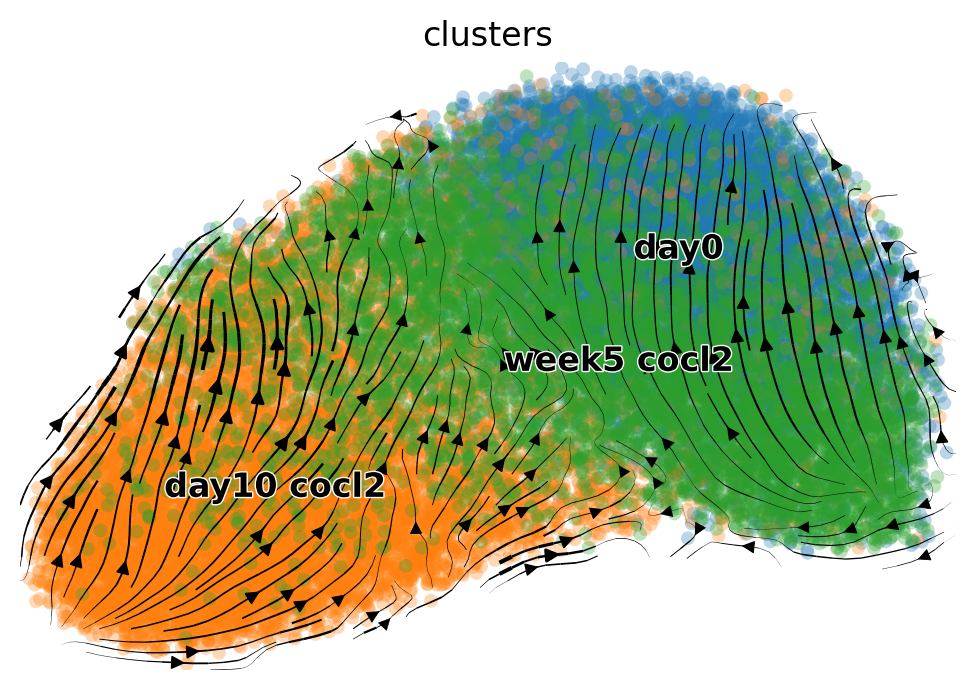

In [28]:
scv.pl.velocity_embedding_stream(adata, basis='umap')

computing terminal states
    identified 10 regions of root cells and 1 region of end points .
    finished (0:00:10) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


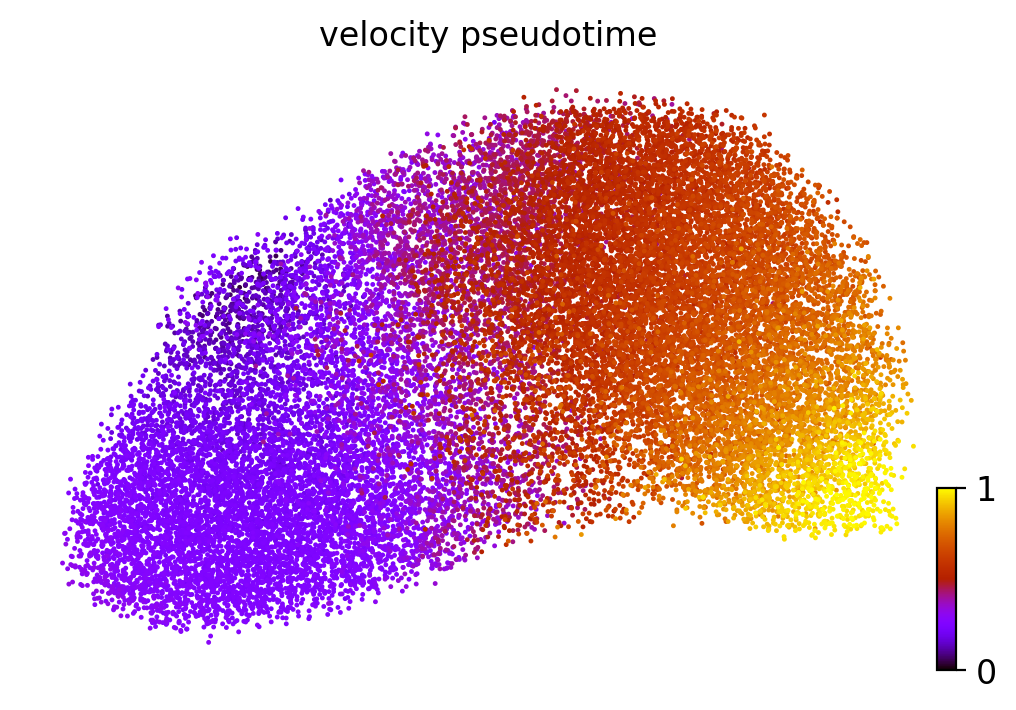

In [29]:
scv.tl.velocity_pseudotime(adata)
scv.pl.scatter(adata, color='velocity_pseudotime', cmap='gnuplot')